In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

df = pd.read_csv("../../datasets/electric_day.txt", sep=';')
df.set_index('dt', inplace=True)
df.index = pd.to_datetime(df.index)
print("Length of dataset", len(df))
print(df.head())

Length of dataset 1462
            MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  MT_008  \
dt                                                                           
2011-01-01     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-02     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-03     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-04     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-05     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            MT_009  MT_010  ...  MT_361  MT_362  MT_363  MT_364  MT_365  \
dt                          ...                                           
2011-01-01     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-02     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-03     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-04     0.0     0.0  ...     0.0     0.0     0.0

Text(0.5, 1.0, "140th client's electric")

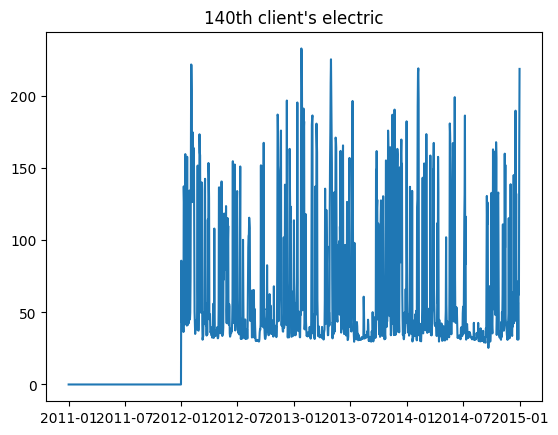

In [2]:

# Visualize the data
plt.plot(df["MT_140"])
plt.title("140th client's electric")



In [3]:
# num_of_datapoints = 500
# df_days = df_days.iloc[:num_of_datapoints, :50] # only use a 500 time point and 50 houses

num_of_datapoints = 500
df_days = df.iloc[:num_of_datapoints, 155:165] # only use a 500 time point and 50 houses

In [4]:

from sklearn.preprocessing import MinMaxScaler
# For each client, we have different distribution 
# So we need to store the scaling of each client in a map 
scaler_map = {}
df_scaled = df_days
for col_idx, column in enumerate(df_scaled.columns):
    if column[0] == 'n':
        continue
    scaler = MinMaxScaler()  # Initialize the scaler
    df_scaled[column] = scaler.fit_transform(df_scaled[[column]])  # Scale the column in-place
    scaler_map[col_idx] = scaler  # Store the scaler in the dictionary with the column index as the key

In [5]:
# Data splitting 
train_size = int(num_of_datapoints * 0.5)
val_size = int(0.75 * num_of_datapoints) - train_size
patch_size5 = 5
patch_size20 = 20
patch_size60 = 60
# really ugly codes here 
x_train, y_train, x_train_p5, y_train_p5, x_train_p20, y_train_p20, x_train_p60, y_train_p60 = [], [], [], [], [], [], [], []
x_val, y_val, x_val_p5, y_val_p5, x_val_p20, y_val_p20, x_val_p60, y_val_p60 = [], [], [], [], [], [], [], []
x_test, y_test, x_test_p5, y_test_p5, x_test_p20, y_test_p20, x_test_p60, y_test_p60 = [], [], [], [], [], [], [], []
for column_name in df_scaled.columns:
    print(column_name)
    # access the current column
    data = df_scaled[column_name].values
    train_data = data[0:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]
    def getDataWithPatch(patch, stride, data_list):
        
        x = []
        y = []
        for i in range(patch, len(data_list), stride):
            x.append(data_list[i-patch:i])
            y.append(data_list[i])
        
        # Convert to numpy array
        # x, y = np.array(x), np.array(y)
        # Reshaping the input to (n_samples, time_steps, n_feature)
        # x = np.reshape(x, (x.shape[0], x.shape[1], 1))
        return x, y
        
    # For now, assume a stride of 0 (no overlaps for now)
    cur_x, cur_y = getDataWithPatch(1, 1, train_data)
    x_train.extend(cur_x)
    y_train.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size5, 1, train_data)
    x_train_p5.extend(cur_x)
    y_train_p5.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size20, 1, train_data)
    x_train_p20.extend(cur_x)
    y_train_p20.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size60, 1, train_data)
    x_train_p60.extend(cur_x)
    y_train_p60.extend(cur_y)
    
    cur_x, cur_y = getDataWithPatch(1, 1, val_data)
    x_val.extend(cur_x)
    y_val.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size5, 1, val_data)
    x_val_p5.extend(cur_x)
    y_val_p5.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size20, 1, val_data)
    x_val_p20.extend(cur_x)
    y_val_p20.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size60, 1, val_data)
    x_val_p60.extend(cur_x)
    y_val_p60.extend(cur_y)

    cur_x, cur_y = getDataWithPatch(1, 1, test_data)
    x_test.extend(cur_x)
    y_test.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size5, 1, test_data)
    x_test_p5.extend(cur_x)
    y_test_p5.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size20, 1, test_data)
    x_test_p20.extend(cur_x)
    y_test_p20.extend(cur_y)
    cur_x, cur_y = getDataWithPatch(patch_size60, 1, test_data)
    x_test_p60.extend(cur_x)
    y_test_p60.extend(cur_y)
    


MT_156
MT_157
MT_158
MT_159
MT_160
MT_161
MT_162
MT_163
MT_164
MT_165


In [6]:
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.array(y_train)
y_train = np.reshape(y_train, (y_train.shape[0], 1))

x_train_p5 = np.array(x_train_p5)
x_train_p5 = np.reshape(x_train_p5, (x_train_p5.shape[0], x_train_p5.shape[1], 1)) 
y_train_p5 = np.array(y_train_p5)
y_train_p5 = np.reshape(y_train_p5, (y_train_p5.shape[0], 1))

x_train_p20 = np.array(x_train_p20)
x_train_p20 = np.reshape(x_train_p20, (x_train_p20.shape[0], x_train_p20.shape[1], 1)) 
y_train_p20 = np.array(y_train_p20)
y_train_p20 = np.reshape(y_train_p20, (y_train_p20.shape[0], 1))

x_train_p60 = np.array(x_train_p60)
x_train_p60 = np.reshape(x_train_p60, (x_train_p60.shape[0], x_train_p60.shape[1], 1)) 
y_train_p60 = np.array(y_train_p60)
y_train_p60 = np.reshape(y_train_p60, (y_train_p60.shape[0], 1))

x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
y_val = np.array(y_val)
y_val = np.reshape(y_val, (y_val.shape[0], 1))

x_val_p5 = np.array(x_val_p5)
x_val_p5 = np.reshape(x_val_p5, (x_val_p5.shape[0], x_val_p5.shape[1], 1)) 
y_val_p5 = np.array(y_val_p5)
y_val_p5 = np.reshape(y_val_p5, (y_val_p5.shape[0], 1))

x_val_p20 = np.array(x_val_p20)
x_val_p20 = np.reshape(x_val_p20, (x_val_p20.shape[0], x_val_p20.shape[1], 1)) 
y_val_p20 = np.array(y_val_p20)
y_val_p20 = np.reshape(y_val_p20, (y_val_p20.shape[0], 1))

x_val_p60 = np.array(x_val_p60)
x_val_p60 = np.reshape(x_val_p60, (x_val_p60.shape[0], x_val_p60.shape[1], 1)) 
y_val_p60 = np.array(y_val_p60)
y_val_p60 = np.reshape(y_val_p60, (y_val_p60.shape[0], 1))

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.array(y_test)
y_test = np.reshape(y_test, (y_test.shape[0], 1))

x_test_p5 = np.array(x_test_p5)
x_test_p5 = np.reshape(x_test_p5, (x_test_p5.shape[0], x_test_p5.shape[1], 1)) 
y_test_p5 = np.array(y_test_p5)
y_test_p5 = np.reshape(y_test_p5, (y_test_p5.shape[0], 1))

x_test_p20 = np.array(x_test_p20)
x_test_p20 = np.reshape(x_test_p20, (x_test_p20.shape[0], x_test_p20.shape[1], 1)) 
y_test_p20 = np.array(y_test_p20)
y_test_p20 = np.reshape(y_test_p20, (y_test_p20.shape[0], 1))

x_test_p60 = np.array(x_test_p60)
x_test_p60 = np.reshape(x_test_p60, (x_test_p60.shape[0], x_test_p60.shape[1], 1)) 
y_test_p60 = np.array(y_test_p60)
y_test_p60 = np.reshape(y_test_p60, (y_test_p60.shape[0], 1))

In [7]:
# np.reshape(x_train, (x_train[0], x_train[1], 1))

In [8]:

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

model_p5 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p5.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_p5.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p5.summary()

model_p20 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p20.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_p20.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p20.summary()

model_p60 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train_p60.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_p60.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model_p60.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
______________________________

In [9]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)


Epoch 1/100
78/78 [==============================] - 5s 5ms/step - loss: 0.0877 - mean_absolute_error: 0.2262
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.1166
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0337 - mean_absolute_error: 0.1157
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0341 - mean_absolute_error: 0.1176
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.1165
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.1173
Epoch 7/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0339 - mean_absolute_error: 0.1170
Epoch 8/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.1151
Epoch 9/100
78/78 [==============================] - 0s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.1174
Epoch 10/1

In [10]:
history_p5 = model_p5.fit(x_train_p5, y_train_p5, epochs= 100, batch_size= 32)

Epoch 1/100
77/77 [==============================] - 4s 8ms/step - loss: 0.0648 - mean_absolute_error: 0.1807
Epoch 2/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.1255
Epoch 3/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0352 - mean_absolute_error: 0.1191
Epoch 4/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.1149
Epoch 5/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.1117
Epoch 6/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.1089
Epoch 7/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.1057
Epoch 8/100
77/77 [==============================] - 1s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.1090
Epoch 9/100
77/77 [==============================] - 1s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0985
Epoch 10/1

In [11]:
history_p20 = model_p20.fit(x_train_p20, y_train_p20, epochs= 100, batch_size= 32)

Epoch 1/100
72/72 [==============================] - 6s 20ms/step - loss: 0.0451 - mean_absolute_error: 0.1412
Epoch 2/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0261 - mean_absolute_error: 0.0947
Epoch 3/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0264 - mean_absolute_error: 0.0960
Epoch 4/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0261 - mean_absolute_error: 0.0948
Epoch 5/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0252 - mean_absolute_error: 0.0916
Epoch 6/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0252 - mean_absolute_error: 0.0947
Epoch 7/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0239 - mean_absolute_error: 0.0930
Epoch 8/100
72/72 [==============================] - 1s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0943
Epoch 9/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0220 - mean_absolute_error: 0.0877
E

In [12]:
history_p60 = model_p60.fit(x_train_p60, y_train_p60, epochs= 100, batch_size= 32)

Epoch 1/100
60/60 [==============================] - 10s 63ms/step - loss: 0.0384 - mean_absolute_error: 0.1274
Epoch 2/100
60/60 [==============================] - 4s 60ms/step - loss: 0.0251 - mean_absolute_error: 0.0953
Epoch 3/100
60/60 [==============================] - 4s 61ms/step - loss: 0.0251 - mean_absolute_error: 0.0938
Epoch 4/100
60/60 [==============================] - 4s 61ms/step - loss: 0.0255 - mean_absolute_error: 0.0955
Epoch 5/100
60/60 [==============================] - 4s 60ms/step - loss: 0.0252 - mean_absolute_error: 0.0935
Epoch 6/100
60/60 [==============================] - 3s 58ms/step - loss: 0.0248 - mean_absolute_error: 0.0917
Epoch 7/100
60/60 [==============================] - 3s 51ms/step - loss: 0.0248 - mean_absolute_error: 0.0935
Epoch 8/100
60/60 [==============================] - 3s 54ms/step - loss: 0.0250 - mean_absolute_error: 0.0923
Epoch 9/100
60/60 [==============================] - 4s 63ms/step - loss: 0.0251 - mean_absolute_error: 0.0944


Text(0, 0.5, 'loss')

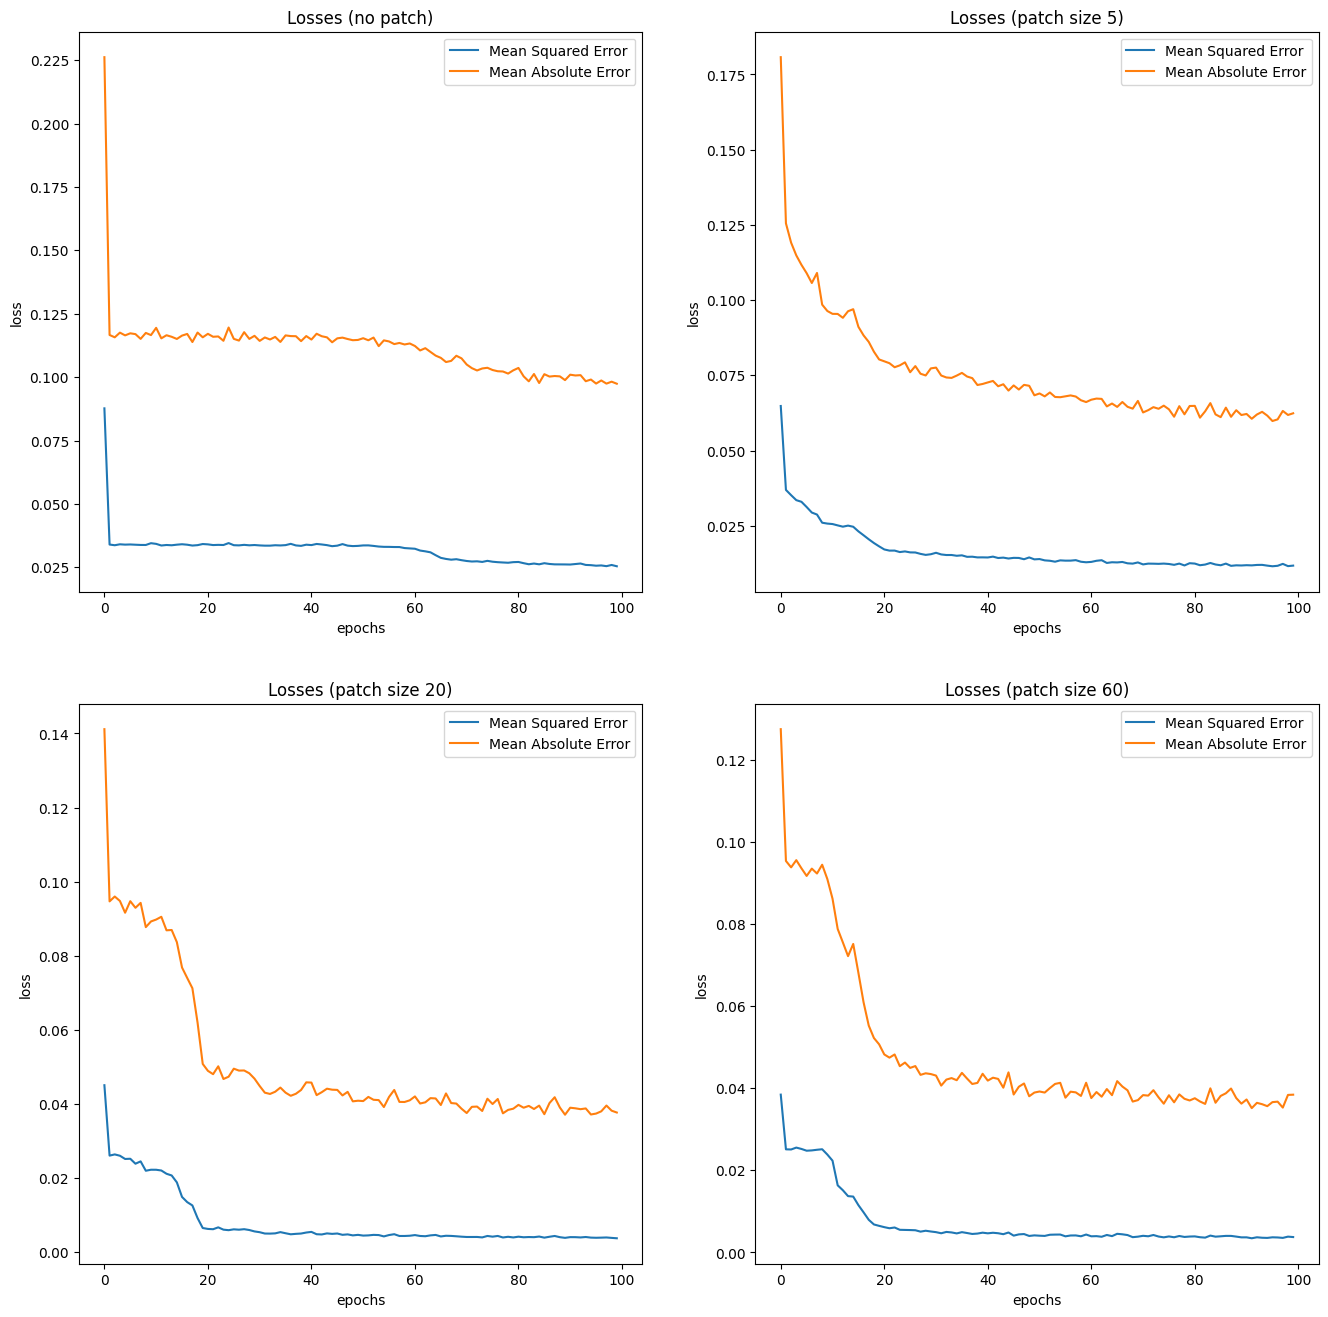

In [13]:
fig, (axs) = plt.subplots(2, 2, figsize=(16, 16))
# fig(figsize=(16, 16))
axs[0, 0].plot(history.history["loss"])
axs[0, 0].plot(history.history["mean_absolute_error"])
axs[0, 0].set_title("Losses (no patch)")
axs[0, 0].legend(['Mean Squared Error','Mean Absolute Error'])
axs[0, 0].set_xlabel("epochs")
axs[0, 0].set_ylabel("loss")


axs[0, 1].plot(history_p5.history["loss"])
axs[0, 1].plot(history_p5.history["mean_absolute_error"])
axs[0, 1].set_title("Losses (patch size 5)")
axs[0, 1].legend(['Mean Squared Error','Mean Absolute Error'])
axs[0, 1].set_xlabel("epochs")
axs[0, 1].set_ylabel("loss")


axs[1, 0].plot(history_p20.history["loss"])
axs[1, 0].plot(history_p20.history["mean_absolute_error"])
axs[1, 0].set_title("Losses (patch size 20)")
axs[1, 0].legend(['Mean Squared Error','Mean Absolute Error'])
axs[1, 0].set_xlabel("epochs")
axs[1, 0].set_ylabel("loss")


axs[1, 1].plot(history_p60.history["loss"])
axs[1, 1].plot(history_p60.history["mean_absolute_error"])
axs[1, 1].set_title("Losses (patch size 60)")
axs[1, 1].legend(['Mean Squared Error','Mean Absolute Error'])
axs[1, 1].set_xlabel("epochs")
axs[1, 1].set_ylabel("loss")


In [14]:
train_pred = model.predict(x_train)
train_pred_p5 = model_p5.predict(x_train_p5)
train_pred_p20 = model_p20.predict(x_train_p20)
train_pred_p60 = model_p60.predict(x_train_p60)

val_pred = model.predict(x_val)
val_pred_p5 = model_p5.predict(x_val_p5)
val_pred_p20 = model_p20.predict(x_val_p20)
val_pred_p60 = model_p60.predict(x_val_p60)

test_pred = model.predict(x_test)
test_pred_p5 = model_p5.predict(x_test_p5)
test_pred_p20 = model_p20.predict(x_test_p20)
test_pred_p60 = model_p60.predict(x_test_p60)

21/21 [==============================] - 1s 25ms/step


In [15]:

def scale_independently(data_list, data_size, patch_size):
    
    data_list = data_list.reshape(-1)
    offset = data_size - patch_size 
    curId = 0
    while curId < len(data_list):
        scaler = scaler_map[curId // offset] 
        data_list[curId: curId + offset] = scaler.inverse_transform(data_list[curId: curId + offset].reshape(-1, 1)).reshape(-1)
        # e.g. if I am at index 2000 and there's only 2300 data points 
        curId += offset 
    
scale_independently(train_pred, train_size, 1)
scale_independently(val_pred, val_size, 1, )
scale_independently(test_pred, val_size, 1, )

scale_independently(train_pred_p5, train_size, 5)
scale_independently(val_pred_p5, val_size, 5, )
scale_independently(test_pred_p5, val_size, 5, )

scale_independently(train_pred_p20, train_size, 20)
scale_independently(val_pred_p20, val_size, 20, )
scale_independently(test_pred_p20, val_size, 20, )

scale_independently(train_pred_p60, train_size, 60)
scale_independently(val_pred_p60, val_size, 60, )
scale_independently(test_pred_p60, val_size, 60, )

scale_independently(y_train, train_size, 1)
scale_independently(y_val, val_size, 1, )
scale_independently(y_test, val_size, 1, )

scale_independently(y_train_p5, train_size, 5)
scale_independently(y_val_p5, val_size, 5, )
scale_independently(y_test_p5, val_size, 5, )

scale_independently(y_train_p20, train_size, 20)
scale_independently(y_val_p20, val_size, 20, )
scale_independently(y_test_p20, val_size, 20, )

scale_independently(y_train_p60, train_size, 60)
scale_independently(y_val_p60, val_size, 60, )
scale_independently(y_test_p60, val_size, 60, )


In [16]:
from sklearn.metrics import mean_squared_error
from helper import crps_pwm, kl_div_, js_div_, CRPS
# from scipy.special import kl_div_

def getResultsNormal():
    print("Now printing results with no refeeding")
    train_rmse = mean_squared_error(y_train, train_pred,  squared=False)
    train_rmse_p5 = mean_squared_error(y_train_p5, train_pred_p5,  squared=False)
    train_rmse_p20 = mean_squared_error(y_train_p20, train_pred_p20,  squared=False)
    train_rmse_p60 = mean_squared_error(y_train_p60, train_pred_p60,  squared=False)

    val_rmse = mean_squared_error(y_val, val_pred,  squared=False)
    val_rmse_p5 = mean_squared_error(y_val_p5, val_pred_p5,  squared=False)
    val_rmse_p20 = mean_squared_error(y_val_p20, val_pred_p20,  squared=False)
    val_rmse_p60 = mean_squared_error(y_val_p60, val_pred_p60,  squared=False)

    test_rmse = mean_squared_error(y_test, test_pred,  squared=False)
    test_rmse_p5 = mean_squared_error(y_test_p5, test_pred_p5,  squared=False)
    test_rmse_p20 = mean_squared_error(y_test_p20, test_pred_p20,  squared=False)
    test_rmse_p60 = mean_squared_error(y_test_p60, test_pred_p60,  squared=False)

    print(f"Train RMSE (no patch) : {train_rmse}")
    print(f"Val RMSE (no patch) : {val_rmse}")
    print(f"Test RMSE (no patch) : {test_rmse}")
    print("------------------------------")
    print(f"Train RMSE (patch size 5) : {train_rmse_p5}")
    print(f"Val RMSE (patch size 5) : {val_rmse_p5}")
    print(f"Test RMSE (patch size 5) : {test_rmse_p5}")
    print("------------------------------")
    print(f"Train RMSE (patch size 20) : {train_rmse_p20}")
    print(f"Val RMSE (patch size 20) : {val_rmse_p20}")
    print(f"Test RMSE (patch size 20) : {test_rmse_p20}")
    print("------------------------------")
    print(f"Train RMSE (patch size 60) : {train_rmse_p60}")
    print(f"Val RMSE (patch size 60) : {val_rmse_p60}")
    print(f"Test RMSE (patch size 60) : {test_rmse_p60}")
    
    
def getResultsNormalCRPS():
    
    print("Now printing results with no refeeding")
    train_crps = CRPS(y_train, train_pred)
    train_crps_p5 = CRPS(y_train_p5, train_pred_p5)
    train_crps_p20 = CRPS(y_train_p20, train_pred_p20)
    train_crps_p60 = CRPS(y_train_p60, train_pred_p60)

    val_crps = CRPS(y_val, val_pred)
    val_crps_p5 = CRPS(y_val_p5, val_pred_p5)
    val_crps_p20 = CRPS(y_val_p20, val_pred_p20)
    val_crps_p60 = CRPS(y_val_p60, val_pred_p60)

    test_crps = CRPS(y_test, test_pred)
    test_crps_p5 = CRPS(y_test_p5, test_pred_p5)
    test_crps_p20 = CRPS(y_test_p20, test_pred_p20)
    test_crps_p60 = CRPS(y_test_p60, test_pred_p60)

    print(f"Train crps (no patch) : {train_crps}")
    print(f"Val crps (no patch) : {val_crps}")
    print(f"Test crps (no patch) : {test_crps}")
    print("------------------------------")
    print(f"Train crps (patch size 5) : {train_crps_p5}")
    print(f"Val crps (patch size 5) : {val_crps_p5}")
    print(f"Test crps (patch size 5) : {test_crps_p5}")
    print("------------------------------")
    print(f"Train crps (patch size 20) : {train_crps_p20}")
    print(f"Val crps (patch size 20) : {val_crps_p20}")
    print(f"Test crps (patch size 20) : {test_crps_p20}")
    print("------------------------------")
    print(f"Train crps (patch size 60) : {train_crps_p60}")
    print(f"Val crps (patch size 60) : {val_crps_p60}")
    print(f"Test crps (patch size 60) : {test_crps_p60}")
    
    
def getResultsNormalKL():
    
    print("Now printing results with no refeeding")
    train_KL = kl_div_(y_train, train_pred)
    train_KL_p5 = kl_div_(y_train_p5, train_pred_p5)
    train_KL_p20 = kl_div_(y_train_p20, train_pred_p20)
    train_KL_p60 = kl_div_(y_train_p60, train_pred_p60)

    val_KL = kl_div_(y_val, val_pred)
    val_KL_p5 = kl_div_(y_val_p5, val_pred_p5)
    val_KL_p20 = kl_div_(y_val_p20, val_pred_p20)
    val_KL_p60 = kl_div_(y_val_p60, val_pred_p60)

    test_KL = kl_div_(y_test, test_pred)
    test_KL_p5 = kl_div_(y_test_p5, test_pred_p5)
    test_KL_p20 = kl_div_(y_test_p20, test_pred_p20)
    test_KL_p60 = kl_div_(y_test_p60, test_pred_p60)

    print(f"Train KL (no patch) : {train_KL}")
    print(f"Val KL (no patch) : {val_KL}")
    print(f"Test KL (no patch) : {test_KL}")
    print("------------------------------")
    print(f"Train KL (patch size 5) : {train_KL_p5}")
    print(f"Val KL (patch size 5) : {val_KL_p5}")
    print(f"Test KL (patch size 5) : {test_KL_p5}")
    print("------------------------------")
    print(f"Train KL (patch size 20) : {train_KL_p20}")
    print(f"Val KL (patch size 20) : {val_KL_p20}")
    print(f"Test KL (patch size 20) : {test_KL_p20}")
    print("------------------------------")
    print(f"Train KL (patch size 60) : {train_KL_p60}")
    print(f"Val KL (patch size 60) : {val_KL_p60}")
    print(f"Test KL (patch size 60) : {test_KL_p60}")
    
def getResultsNormalJS():
    
    print("Now printing results with no refeeding")
    train_JS = js_div_(y_train, train_pred)
    train_JS_p5 = js_div_(y_train_p5, train_pred_p5)
    train_JS_p20 = js_div_(y_train_p20, train_pred_p20)
    train_JS_p60 = js_div_(y_train_p60, train_pred_p60)

    val_JS = js_div_(y_val, val_pred)
    val_JS_p5 = js_div_(y_val_p5, val_pred_p5)
    val_JS_p20 = js_div_(y_val_p20, val_pred_p20)
    val_JS_p60 = js_div_(y_val_p60, val_pred_p60)

    test_JS = js_div_(y_test, test_pred)
    test_JS_p5 = js_div_(y_test_p5, test_pred_p5)
    test_JS_p20 = js_div_(y_test_p20, test_pred_p20)
    test_JS_p60 = js_div_(y_test_p60, test_pred_p60)

    print(f"Train JS (no patch) : {train_JS}")
    print(f"Val JS (no patch) : {val_JS}")
    print(f"Test JS (no patch) : {test_JS}")
    print("------------------------------")
    print(f"Train JS (patch size 5) : {train_JS_p5}")
    print(f"Val JS (patch size 5) : {val_JS_p5}")
    print(f"Test JS (patch size 5) : {test_JS_p5}")
    print("------------------------------")
    print(f"Train JS (patch size 20) : {train_JS_p20}")
    print(f"Val JS (patch size 20) : {val_JS_p20}")
    print(f"Test JS (patch size 20) : {test_JS_p20}")
    print("------------------------------")
    print(f"Train JS (patch size 60) : {train_JS_p60}")
    print(f"Val JS (patch size 60) : {val_JS_p60}")
    print(f"Test JS (patch size 60) : {test_JS_p60}")
    
getResultsNormal()
print("====================================")
getResultsNormalCRPS()
print("====================================")
getResultsNormalKL()
print("====================================")
getResultsNormalJS()

Now printing results with no refeeding
Train RMSE (no patch) : 94.4479236620224
Val RMSE (no patch) : 93.81298723570742
Test RMSE (no patch) : 147.48077694153332
------------------------------
Train RMSE (patch size 5) : 81.74292131571391
Val RMSE (patch size 5) : 98.52034443523902
Test RMSE (patch size 5) : 129.69164137330145
------------------------------
Train RMSE (patch size 20) : 69.39834355117885
Val RMSE (patch size 20) : 84.8381322211244
Test RMSE (patch size 20) : 55.25912175541735
------------------------------
Train RMSE (patch size 60) : 65.99737533345035
Val RMSE (patch size 60) : 122.4745677654367
Test RMSE (patch size 60) : 74.57944226165003
Now printing results with no refeeding
Train crps (no patch) : 2.6886631050089587e-05
Val crps (no patch) : 5.951992356743127e-05
Test crps (no patch) : 8.673420262646034e-05
------------------------------
Train crps (patch size 5) : 2.4008719903154245e-05
Val crps (patch size 5) : 5.478679687789849e-05
Test crps (patch size 5) : 6.

In [17]:
# These are data with refeeding
prediction_window = 1 
# For now let's just do 1 prediction window 
train_pred_rf = [] 
train_pred_rf_p5 = [] 
train_pred_rf_p20 = [] 
train_pred_rf_p60 = [] 
val_pred_rf = [] 
val_pred_rf_p5 = [] 
val_pred_rf_p20 = [] 
val_pred_rf_p60 = [] 
test_pred_rf = [] 
test_pred_rf_p5 = [] 
test_pred_rf_p20 = [] 
test_pred_rf_p60 = [] 

def getData(patch, data_list):
    x = data_list[:patch]
    return np.reshape(x, (1, patch, 1))
for column_name in df_scaled.columns:
    print(column_name)
    # access the current column
    data = df_scaled[column_name].values
    train_data = data[0:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]

    # rf stands for refeed 
    x_train_rf = getData(1, train_data)
    x_train_rf_p5 = getData(patch_size5, train_data)
    x_train_rf_p20 = getData(patch_size20, train_data)
    x_train_rf_p60 = getData(patch_size60, train_data)
    train_data_len = len(train_data) 

    x_val_rf = getData(1, val_data)
    x_val_rf_p5 = getData(patch_size5, val_data)
    x_val_rf_p20 = getData(patch_size20, val_data)
    x_val_rf_p60 = getData(patch_size60, val_data)
    val_data_len = len(val_data)

    x_test_rf = getData(1, test_data)
    x_test_rf_p5 = getData(patch_size5, test_data)
    x_test_rf_p20 = getData(patch_size20, test_data)
    x_test_rf_p60 = getData(patch_size60, test_data)
    test_data_len = len(test_data)

    def predictWithRefeeding(model, x_train, patch, data_len):
        y_pred = [] 
        # x_train is of shape (1, patch, 1)
        cur_train = x_train
        # TODO: try different stride/prediciton window
        for i in range(patch, data_len):  
            
            predicted = model.predict(cur_train)
            # TODO: CHECK THIS SYNTAX
            cur_train = np.append(cur_train, [predicted], axis=1)
            # TODO: OPTIMIZE!!!!!!! 
            cur_train = cur_train[:, 1:, :]
            # use the prediction for the next training
            y_pred.append(predicted[0])
        
        return np.array(y_pred)

    train_pred_rf.extend(predictWithRefeeding(model, x_train_rf, 1, train_data_len))
    train_pred_rf_p5.extend(predictWithRefeeding(model_p5, x_train_rf_p5, patch_size5, train_data_len))
    train_pred_rf_p20.extend(predictWithRefeeding(model_p20, x_train_rf_p20, patch_size20, train_data_len))
    train_pred_rf_p60.extend(predictWithRefeeding(model_p60, x_train_rf_p60, patch_size60, train_data_len))

    val_pred_rf.extend(predictWithRefeeding(model, x_val_rf, 1, val_data_len))
    val_pred_rf_p5.extend(predictWithRefeeding(model_p5, x_val_rf_p5, patch_size5, val_data_len))
    val_pred_rf_p20.extend(predictWithRefeeding(model_p20, x_val_rf_p20, patch_size20, val_data_len))
    val_pred_rf_p60.extend(predictWithRefeeding(model_p60, x_val_rf_p60, patch_size60, val_data_len))

    test_pred_rf.extend(predictWithRefeeding(model, x_test_rf, 1, test_data_len))
    test_pred_rf_p5.extend(predictWithRefeeding(model_p5, x_test_rf_p5, patch_size5, test_data_len))
    test_pred_rf_p20.extend(predictWithRefeeding(model_p20, x_test_rf_p20, patch_size20, test_data_len))
    test_pred_rf_p60.extend(predictWithRefeeding(model_p60, x_test_rf_p60, patch_size60, test_data_len))


MT_156


1/1 [==============================] - 0s 19ms/step
MT_157
1/1 [==============================] - 0s 28ms/step
MT_158
1/1 [==============================] - 0s 31ms/step
MT_159
1/1 [==============================] - 0s 34ms/step
MT_160
1/1 [==============================] - 0s 28ms/step
MT_161
1/1 [==============================] - 0s 21ms/step
MT_162
1/1 [==============================] - 0s 16ms/step
MT_163
1/1 [==============================] - 0s 22ms/step
MT_164
1/1 [==============================] - 0s 32ms/step
MT_165
1/1 [==============================] - 0s 27ms/step


In [18]:

train_pred_rf = np.array(train_pred_rf) 
train_pred_rf_p5 = np.array(train_pred_rf_p5) 
train_pred_rf_p20 = np.array(train_pred_rf_p20) 
train_pred_rf_p60 = np.array(train_pred_rf_p60) 
val_pred_rf = np.array(val_pred_rf) 
val_pred_rf_p5 = np.array(val_pred_rf_p5) 
val_pred_rf_p20 = np.array(val_pred_rf_p20) 
val_pred_rf_p60 = np.array(val_pred_rf_p60) 
test_pred_rf = np.array(test_pred_rf) 
test_pred_rf_p5 = np.array(test_pred_rf_p5) 
test_pred_rf_p20 = np.array(test_pred_rf_p20) 
test_pred_rf_p60 = np.array(test_pred_rf_p60) 

In [19]:
assert(train_pred_rf.shape[0] == y_train.shape[0])
assert(train_pred_rf_p5.shape[0] == y_train_p5.shape[0])
assert(train_pred_rf_p20.shape[0] == y_train_p20.shape[0])
assert(train_pred_rf_p60.shape[0] == y_train_p60.shape[0])

assert(val_pred_rf.shape[0] == y_val.shape[0])
assert(val_pred_rf_p5.shape[0] == y_val_p5.shape[0])
assert(val_pred_rf_p20.shape[0] == y_val_p20.shape[0])
assert(val_pred_rf_p60.shape[0] == y_val_p60.shape[0])

assert(test_pred_rf.shape[0] == y_test.shape[0])
assert(test_pred_rf_p5.shape[0] == y_test_p5.shape[0])
assert(test_pred_rf_p20.shape[0] == y_test_p20.shape[0])
assert(test_pred_rf_p60.shape[0] == y_test_p60.shape[0])


In [20]:
y_train.shape

(2490, 1)

In [21]:
# train_pred_rf = scaler.inverse_transform(train_pred_rf)
# train_pred_rf_p5 = scaler.inverse_transform(train_pred_rf_p5)
# train_pred_rf_p20 = scaler.inverse_transform(train_pred_rf_p20)
# train_pred_rf_p60 = scaler.inverse_transform(train_pred_rf_p60)

# val_pred_rf = scaler.inverse_transform(val_pred_rf)
# val_pred_rf_p5 = scaler.inverse_transform(val_pred_rf_p5)
# val_pred_rf_p20 = scaler.inverse_transform(val_pred_rf_p20)
# val_pred_rf_p60 = scaler.inverse_transform(val_pred_rf_p60)

# test_pred_rf = scaler.inverse_transform(test_pred_rf)
# test_pred_rf_p5 = scaler.inverse_transform(test_pred_rf_p5)
# test_pred_rf_p20 = scaler.inverse_transform(test_pred_rf_p20)
# test_pred_rf_p60 = scaler.inverse_transform(test_pred_rf_p60)

        
scale_independently(train_pred_rf, train_size, 1)
scale_independently(val_pred_rf, val_size, 1, )
scale_independently(test_pred_rf, val_size, 1, )

scale_independently(train_pred_rf_p5, train_size, 5)
scale_independently(val_pred_rf_p5, val_size, 5, )
scale_independently(test_pred_rf_p5, val_size, 5, )

scale_independently(train_pred_rf_p20, train_size, 20)
scale_independently(val_pred_rf_p20, val_size, 20, )
scale_independently(test_pred_rf_p20, val_size, 20, )

scale_independently(train_pred_rf_p60, train_size, 60)
scale_independently(val_pred_rf_p60, val_size, 60, )
scale_independently(test_pred_rf_p60, val_size, 60, )

In [22]:
from helper import crps_pwm, crps_nrg, CRPS, kl_div_, js_div_

def getResultsRefeed():
    print("Now printing results with refeeding, and a prediction window of 1")
    
    train_rmse = mean_squared_error(y_train, train_pred_rf,  squared=False)
    train_rmse_p5 = mean_squared_error(y_train_p5, train_pred_rf_p5,  squared=False)
    train_rmse_p20 = mean_squared_error(y_train_p20, train_pred_rf_p20,  squared=False)
    train_rmse_p60 = mean_squared_error(y_train_p60, train_pred_rf_p60,  squared=False)

    val_rmse = mean_squared_error(y_val, val_pred_rf,  squared=False)
    val_rmse_p5 = mean_squared_error(y_val_p5, val_pred_rf_p5,  squared=False)
    val_rmse_p20 = mean_squared_error(y_val_p20, val_pred_rf_p20,  squared=False)
    val_rmse_p60 = mean_squared_error(y_val_p60, val_pred_rf_p60,  squared=False)

    test_rmse = mean_squared_error(y_test, test_pred_rf,  squared=False)
    test_rmse_p5 = mean_squared_error(y_test_p5, test_pred_rf_p5,  squared=False)
    test_rmse_p20 = mean_squared_error(y_test_p20, test_pred_rf_p20,  squared=False)
    test_rmse_p60 = mean_squared_error(y_test_p60, test_pred_rf_p60,  squared=False)

    print(f"Train RMSE (no patch) : {train_rmse}")
    print(f"Val RMSE (no patch) : {val_rmse}")
    print(f"Test RMSE (no patch) : {test_rmse}")
    print("------------------------------")
    print(f"Train RMSE (patch size 5) : {train_rmse_p5}")
    print(f"Val RMSE (patch size 5) : {val_rmse_p5}")
    print(f"Test RMSE (patch size 5) : {test_rmse_p5}")
    print("------------------------------")
    print(f"Train RMSE (patch size 20) : {train_rmse_p20}")
    print(f"Val RMSE (patch size 20) : {val_rmse_p20}")
    print(f"Test RMSE (patch size 20) : {test_rmse_p20}")
    print("------------------------------")
    print(f"Train RMSE (patch size 60) : {train_rmse_p60}")
    print(f"Val RMSE (patch size 60) : {val_rmse_p60}")
    print(f"Test RMSE (patch size 60) : {test_rmse_p60}")
    
def getResultsRefeedCRPS():
    
    print("Now printing results with refeeding, no noise, window size 1")
    train_crps = CRPS(y_train, train_pred_rf)
    train_crps_p5 = CRPS(y_train_p5, train_pred_rf_p5)
    train_crps_p20 = CRPS(y_train_p20, train_pred_rf_p20)
    train_crps_p60 = CRPS(y_train_p60, train_pred_rf_p60)

    val_crps = CRPS(y_val, val_pred_rf)
    val_crps_p5 = CRPS(y_val_p5, val_pred_rf_p5)
    val_crps_p20 = CRPS(y_val_p20, val_pred_rf_p20)
    val_crps_p60 = CRPS(y_val_p60, val_pred_rf_p60)

    test_crps = CRPS(y_test, test_pred_rf)
    test_crps_p5 = CRPS(y_test_p5, test_pred_rf_p5)
    test_crps_p20 = CRPS(y_test_p20, test_pred_rf_p20)
    test_crps_p60 = CRPS(y_test_p60, test_pred_rf_p60)

    print(f"Train crps (no patch) : {train_crps}")
    print(f"Val crps (no patch) : {val_crps}")
    print(f"Test crps (no patch) : {test_crps}")
    print("------------------------------")
    print(f"Train crps (patch size 5) : {train_crps_p5}")
    print(f"Val crps (patch size 5) : {val_crps_p5}")
    print(f"Test crps (patch size 5) : {test_crps_p5}")
    print("------------------------------")
    print(f"Train crps (patch size 20) : {train_crps_p20}")
    print(f"Val crps (patch size 20) : {val_crps_p20}")
    print(f"Test crps (patch size 20) : {test_crps_p20}")
    print("------------------------------")
    print(f"Train crps (patch size 60) : {train_crps_p60}")
    print(f"Val crps (patch size 60) : {val_crps_p60}")
    print(f"Test crps (patch size 60) : {test_crps_p60}")
    
def getResultsRefeedKL():
    
    print("Now printing results with refeeding, no noise, window size 1")
    train_kldiv = kl_div_(y_train, train_pred_rf)
    train_kldiv_p5 = kl_div_(y_train_p5, train_pred_rf_p5)
    train_kldiv_p20 = kl_div_(y_train_p20, train_pred_rf_p20)
    train_kldiv_p60 = kl_div_(y_train_p60, train_pred_rf_p60)

    val_kldiv = kl_div_(y_val, val_pred_rf)
    val_kldiv_p5 = kl_div_(y_val_p5, val_pred_rf_p5)
    val_kldiv_p20 = kl_div_(y_val_p20, val_pred_rf_p20)
    val_kldiv_p60 = kl_div_(y_val_p60, val_pred_rf_p60)

    test_kldiv = kl_div_(y_test, test_pred_rf)
    test_kldiv_p5 = kl_div_(y_test_p5, test_pred_rf_p5)
    test_kldiv_p20 = kl_div_(y_test_p20, test_pred_rf_p20)
    test_kldiv_p60 = kl_div_(y_test_p60, test_pred_rf_p60)

    print(f"Train kldiv (no patch) : {train_kldiv}")
    print(f"Val kldiv (no patch) : {val_kldiv}")
    print(f"Test kldiv (no patch) : {test_kldiv}")
    print("------------------------------")
    print(f"Train kldiv (patch size 5) : {train_kldiv_p5}")
    print(f"Val kldiv (patch size 5) : {val_kldiv_p5}")
    print(f"Test kldiv (patch size 5) : {test_kldiv_p5}")
    print("------------------------------")
    print(f"Train kldiv (patch size 20) : {train_kldiv_p20}")
    print(f"Val kldiv (patch size 20) : {val_kldiv_p20}")
    print(f"Test kldiv (patch size 20) : {test_kldiv_p20}")
    print("------------------------------")
    print(f"Train kldiv (patch size 60) : {train_kldiv_p60}")
    print(f"Val kldiv (patch size 60) : {val_kldiv_p60}")
    print(f"Test kldiv (patch size 60) : {test_kldiv_p60}")
    
def getResultsRefeedJS():
    
    print("Now printing results with refeeding, no noise, window size 1")
    train_jsdiv = js_div_(y_train, train_pred_rf)
    train_jsdiv_p5 = js_div_(y_train_p5, train_pred_rf_p5)
    train_jsdiv_p20 = js_div_(y_train_p20, train_pred_rf_p20)
    train_jsdiv_p60 = js_div_(y_train_p60, train_pred_rf_p60)

    val_jsdiv = js_div_(y_val, val_pred_rf)
    val_jsdiv_p5 = js_div_(y_val_p5, val_pred_rf_p5)
    val_jsdiv_p20 = js_div_(y_val_p20, val_pred_rf_p20)
    val_jsdiv_p60 = js_div_(y_val_p60, val_pred_rf_p60)

    test_jsdiv = js_div_(y_test, test_pred_rf)
    test_jsdiv_p5 = js_div_(y_test_p5, test_pred_rf_p5)
    test_jsdiv_p20 = js_div_(y_test_p20, test_pred_rf_p20)
    test_jsdiv_p60 = js_div_(y_test_p60, test_pred_rf_p60)

    print(f"Train jsdiv (no patch) : {train_jsdiv}")
    print(f"Val jsdiv (no patch) : {val_jsdiv}")
    print(f"Test jsdiv (no patch) : {test_jsdiv}")
    print("------------------------------")
    print(f"Train jsdiv (patch size 5) : {train_jsdiv_p5}")
    print(f"Val jsdiv (patch size 5) : {val_jsdiv_p5}")
    print(f"Test jsdiv (patch size 5) : {test_jsdiv_p5}")
    print("------------------------------")
    print(f"Train jsdiv (patch size 20) : {train_jsdiv_p20}")
    print(f"Val jsdiv (patch size 20) : {val_jsdiv_p20}")
    print(f"Test jsdiv (patch size 20) : {test_jsdiv_p20}")
    print("------------------------------")
    print(f"Train jsdiv (patch size 60) : {train_jsdiv_p60}")
    print(f"Val jsdiv (patch size 60) : {val_jsdiv_p60}")
    print(f"Test jsdiv (patch size 60) : {test_jsdiv_p60}")
    
getResultsRefeedCRPS()
getResultsRefeedKL()
getResultsRefeedJS()

Now printing results with refeeding, no noise, window size 1
Train crps (no patch) : 0.00012478413800133713
Val crps (no patch) : 0.00023608806945028116
Test crps (no patch) : 0.00023096681048251534
------------------------------
Train crps (patch size 5) : 4.817329588701544e-05
Val crps (patch size 5) : 0.00011756992209408174
Test crps (patch size 5) : 0.0001932258531457142
------------------------------
Train crps (patch size 20) : 0.0001757644042217677
Val crps (patch size 20) : 0.00023441992545870057
Test crps (patch size 20) : 0.00010866352837128417
------------------------------
Train crps (patch size 60) : 5.740785352565692e-05
Val crps (patch size 60) : 0.00020067601737566856
Test crps (patch size 60) : 0.00018837511820764955
Now printing results with refeeding, no noise, window size 1
Train kldiv (no patch) : 0.17320864426664398
Val kldiv (no patch) : 0.1646726925921731
Test kldiv (no patch) : 0.06698339041710576
------------------------------
Train kldiv (patch size 5) : 0.06

In [23]:
x_train.shape

(2490, 1, 1)

In [24]:
train_p = pd.DataFrame(data={'Predictions':train_pred.flatten(), 'Actuals':y_train.flatten()})
train_p5 = pd.DataFrame(data={'Predictions':train_pred_p5.flatten(), 'Actuals':y_train_p5.flatten()})
train_p20 = pd.DataFrame(data={'Predictions':train_pred_p20.flatten(), 'Actuals':y_train_p20.flatten()})
train_p60 = pd.DataFrame(data={'Predictions':train_pred_p60.flatten(), 'Actuals':y_train_p60.flatten()})

val_p = pd.DataFrame(data={'Predictions':val_pred.flatten(), 'Actuals':y_val.flatten()})
val_p5 = pd.DataFrame(data={'Predictions':val_pred_p5.flatten(), 'Actuals':y_val_p5.flatten()})
val_p20 = pd.DataFrame(data={'Predictions':val_pred_p20.flatten(), 'Actuals':y_val_p20.flatten()})
val_p60 = pd.DataFrame(data={'Predictions':val_pred_p60.flatten(), 'Actuals':y_val_p60.flatten()})

test_p = pd.DataFrame(data={'Predictions':test_pred.flatten(), 'Actuals':y_test.flatten()})
test_p5 = pd.DataFrame(data={'Predictions':test_pred_p5.flatten(), 'Actuals':y_test_p5.flatten()})
test_p20 = pd.DataFrame(data={'Predictions':test_pred_p20.flatten(), 'Actuals':y_test_p20.flatten()})
test_p60 = pd.DataFrame(data={'Predictions':test_pred_p60.flatten(), 'Actuals':y_test_p60.flatten()})

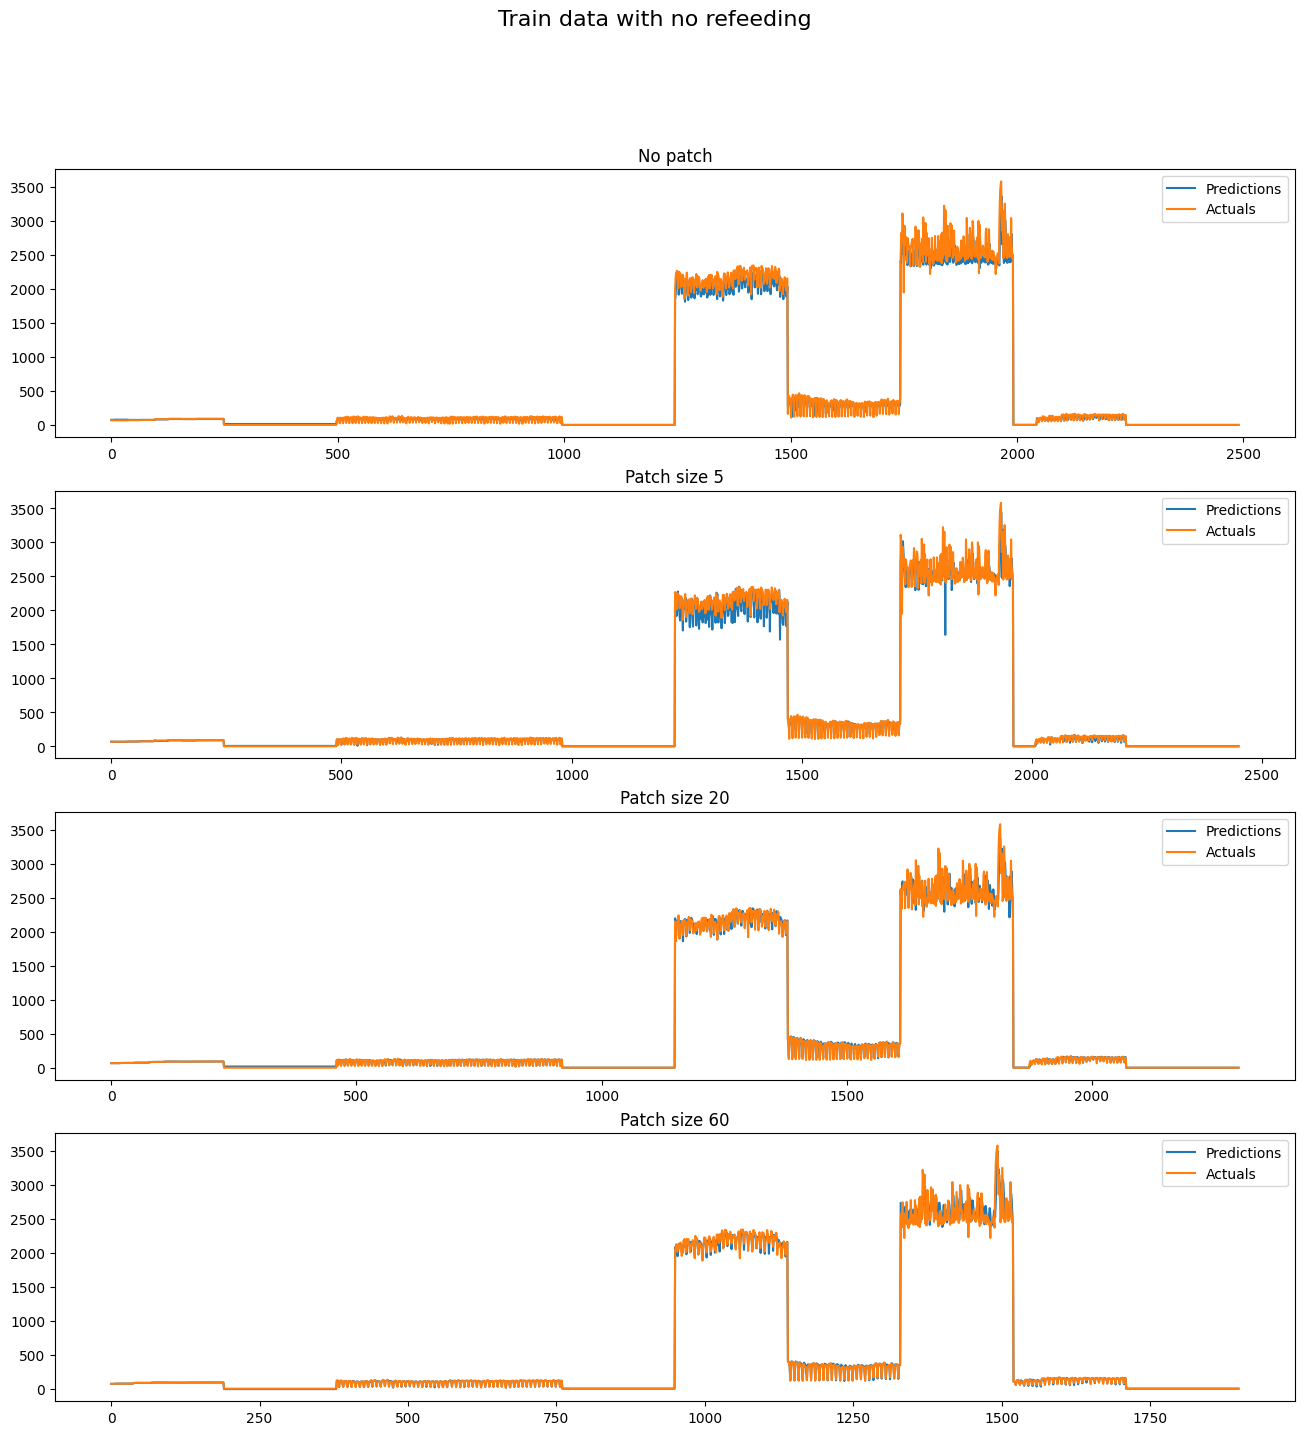

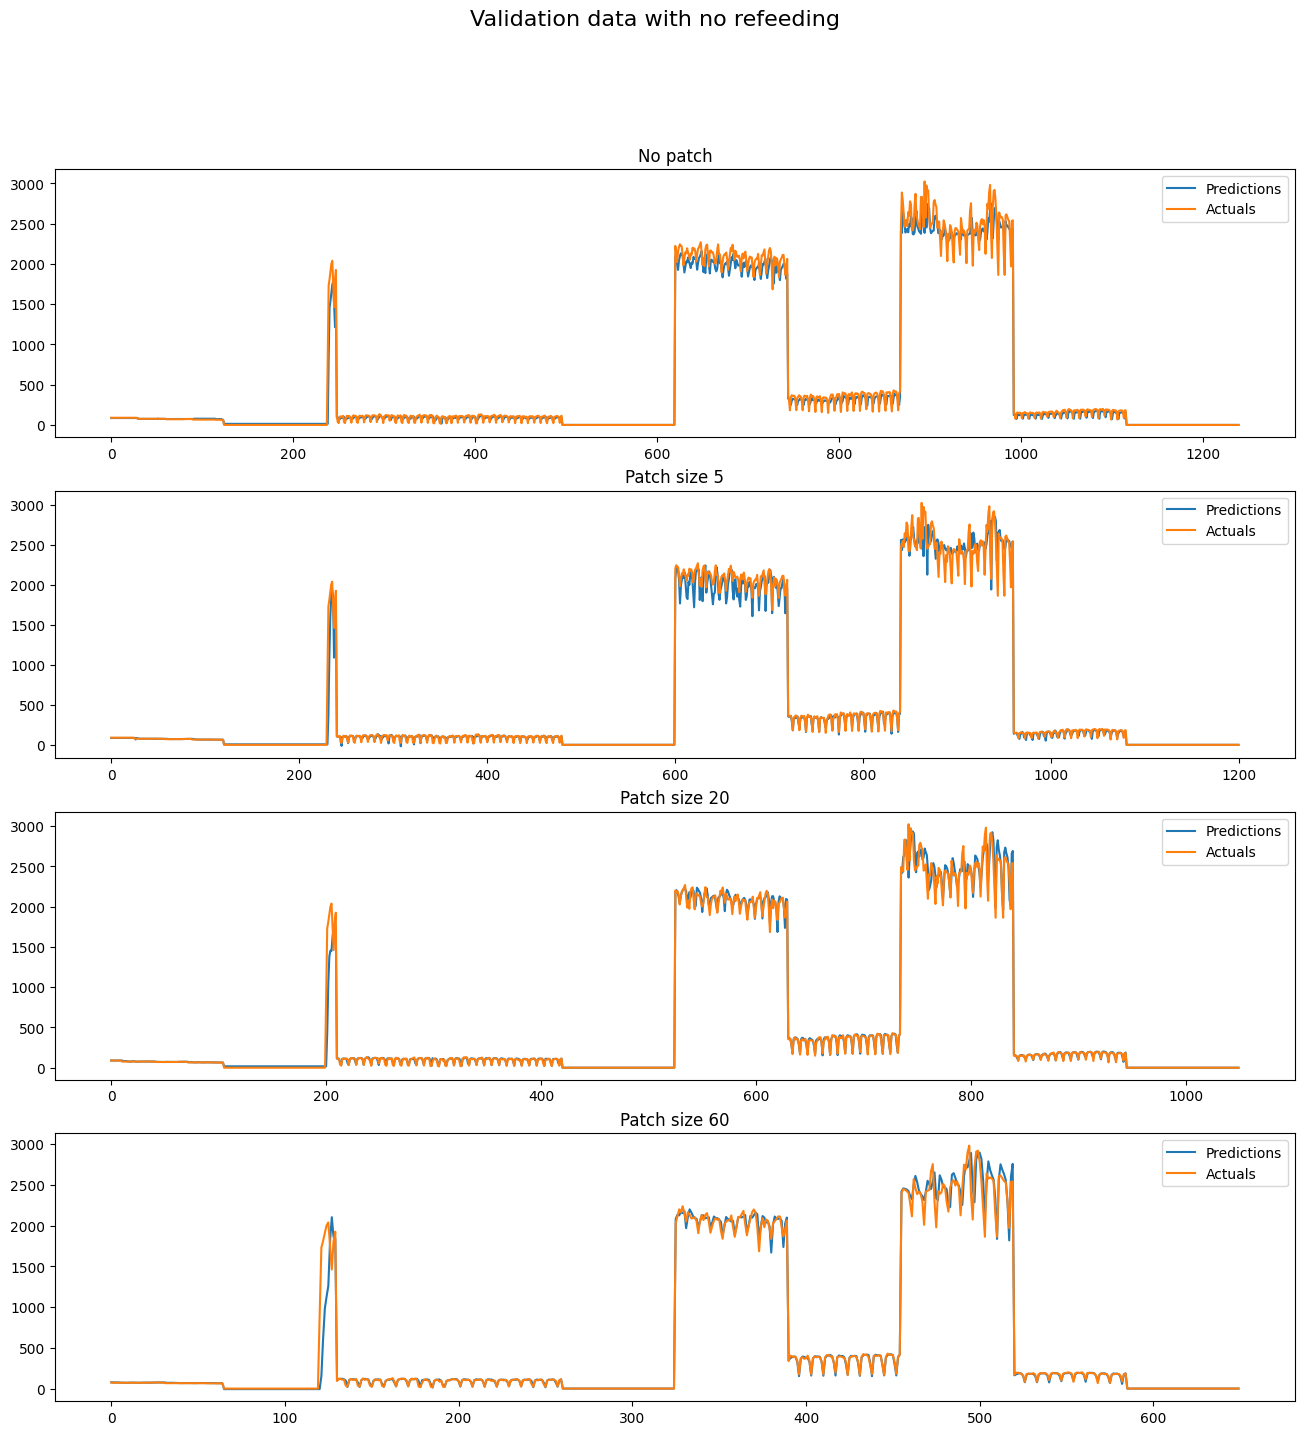

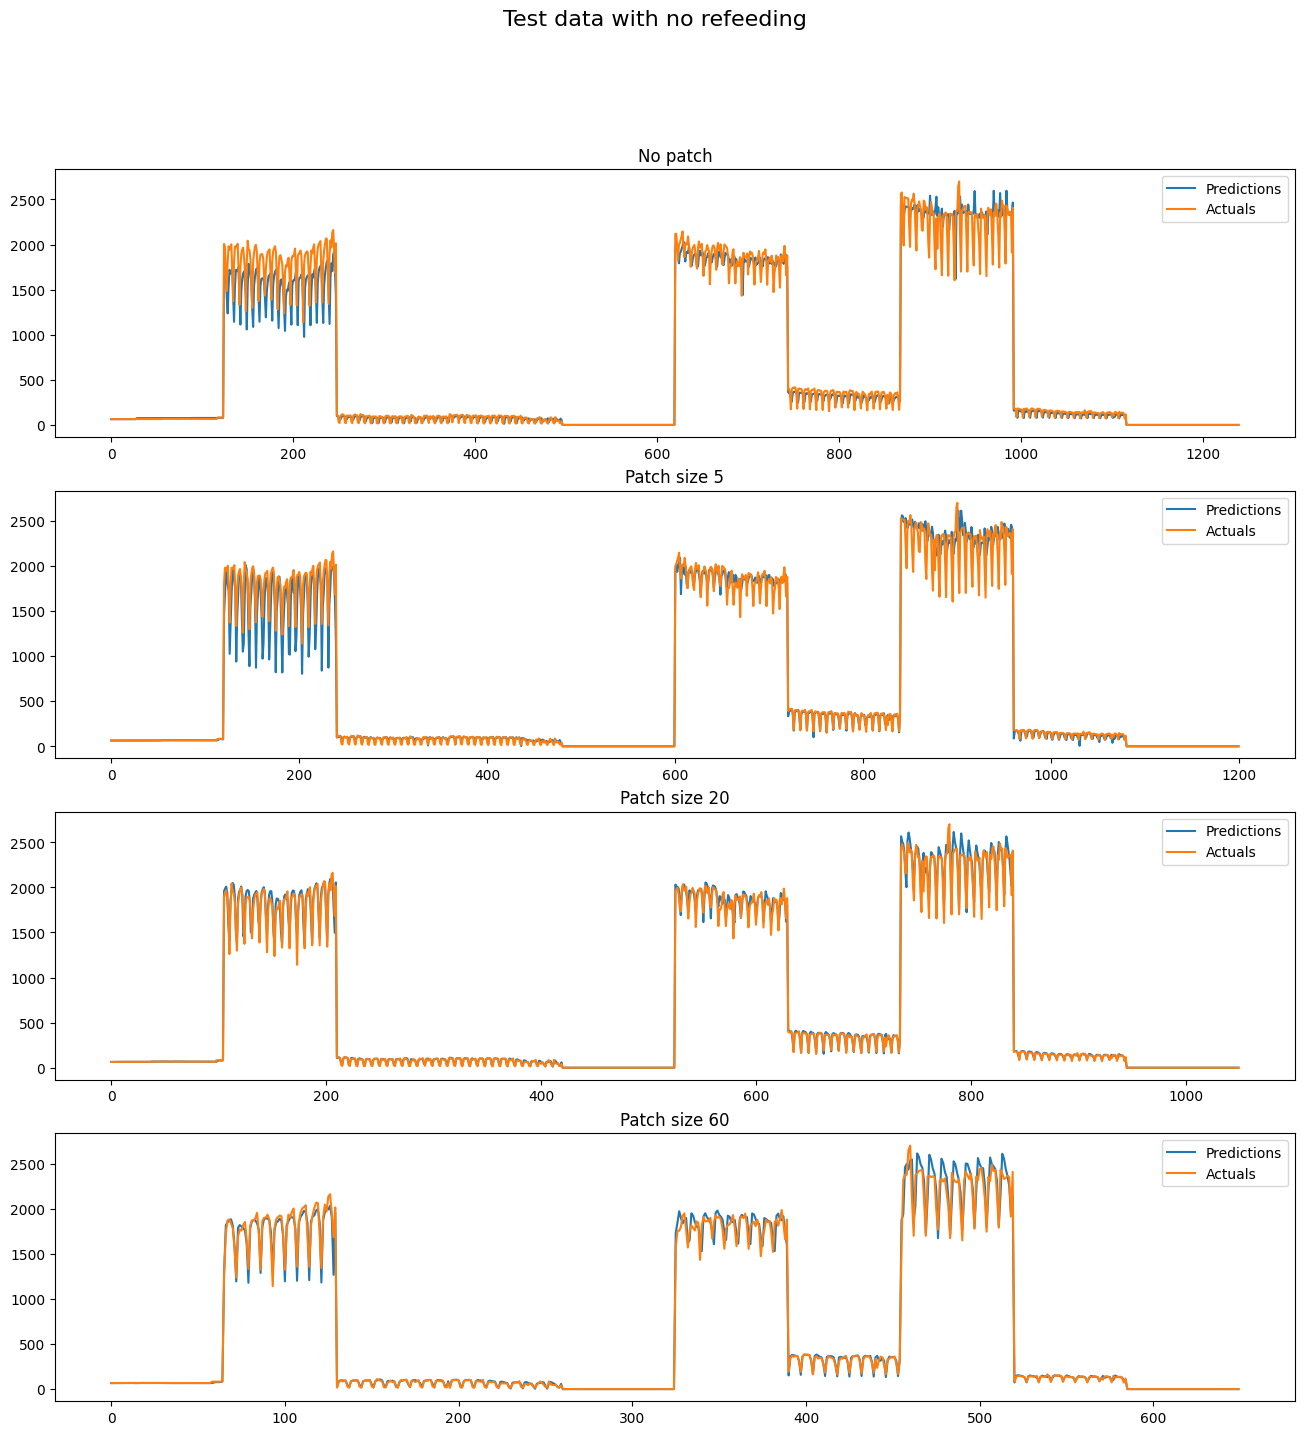

In [25]:
# plt.figure(figsize = (16, 6))
# plt.plot(preds_acts['Predictions'])
# plt.plot(preds_acts['Actuals'])
# plt.legend(['Predictions', 'Actuals'])
# plt.show()

def plotGraph(p, p5, p20, p60, title):
    fig, (axs) = plt.subplots(4, figsize=(16, 16))
    # fig(figsize=(16, 16))
    axs[0].plot(p['Predictions'])
    axs[0].plot(p['Actuals'])
    axs[0].legend(['Predictions', 'Actuals'])
    axs[0].set_title("No patch")

    axs[1].plot(p5['Predictions'])
    axs[1].plot(p5['Actuals'])
    axs[1].legend(['Predictions', 'Actuals'])
    axs[1].set_title("Patch size 5")

    axs[2].plot(p20['Predictions'])
    axs[2].plot(p20['Actuals'])
    axs[2].legend(['Predictions', 'Actuals'])
    axs[2].set_title("Patch size 20")

    axs[3].plot(p60['Predictions'])
    axs[3].plot(p60['Actuals'])
    axs[3].legend(['Predictions', 'Actuals'])
    axs[3].set_title("Patch size 60")
    fig.suptitle(title, fontsize=16)
    
plotGraph(train_p, train_p5, train_p20, train_p60, "Train data with no refeeding")
plotGraph(val_p, val_p5, val_p20, val_p60, "Validation data with no refeeding")
plotGraph(test_p, test_p5, test_p20, test_p60, "Test data with no refeeding")


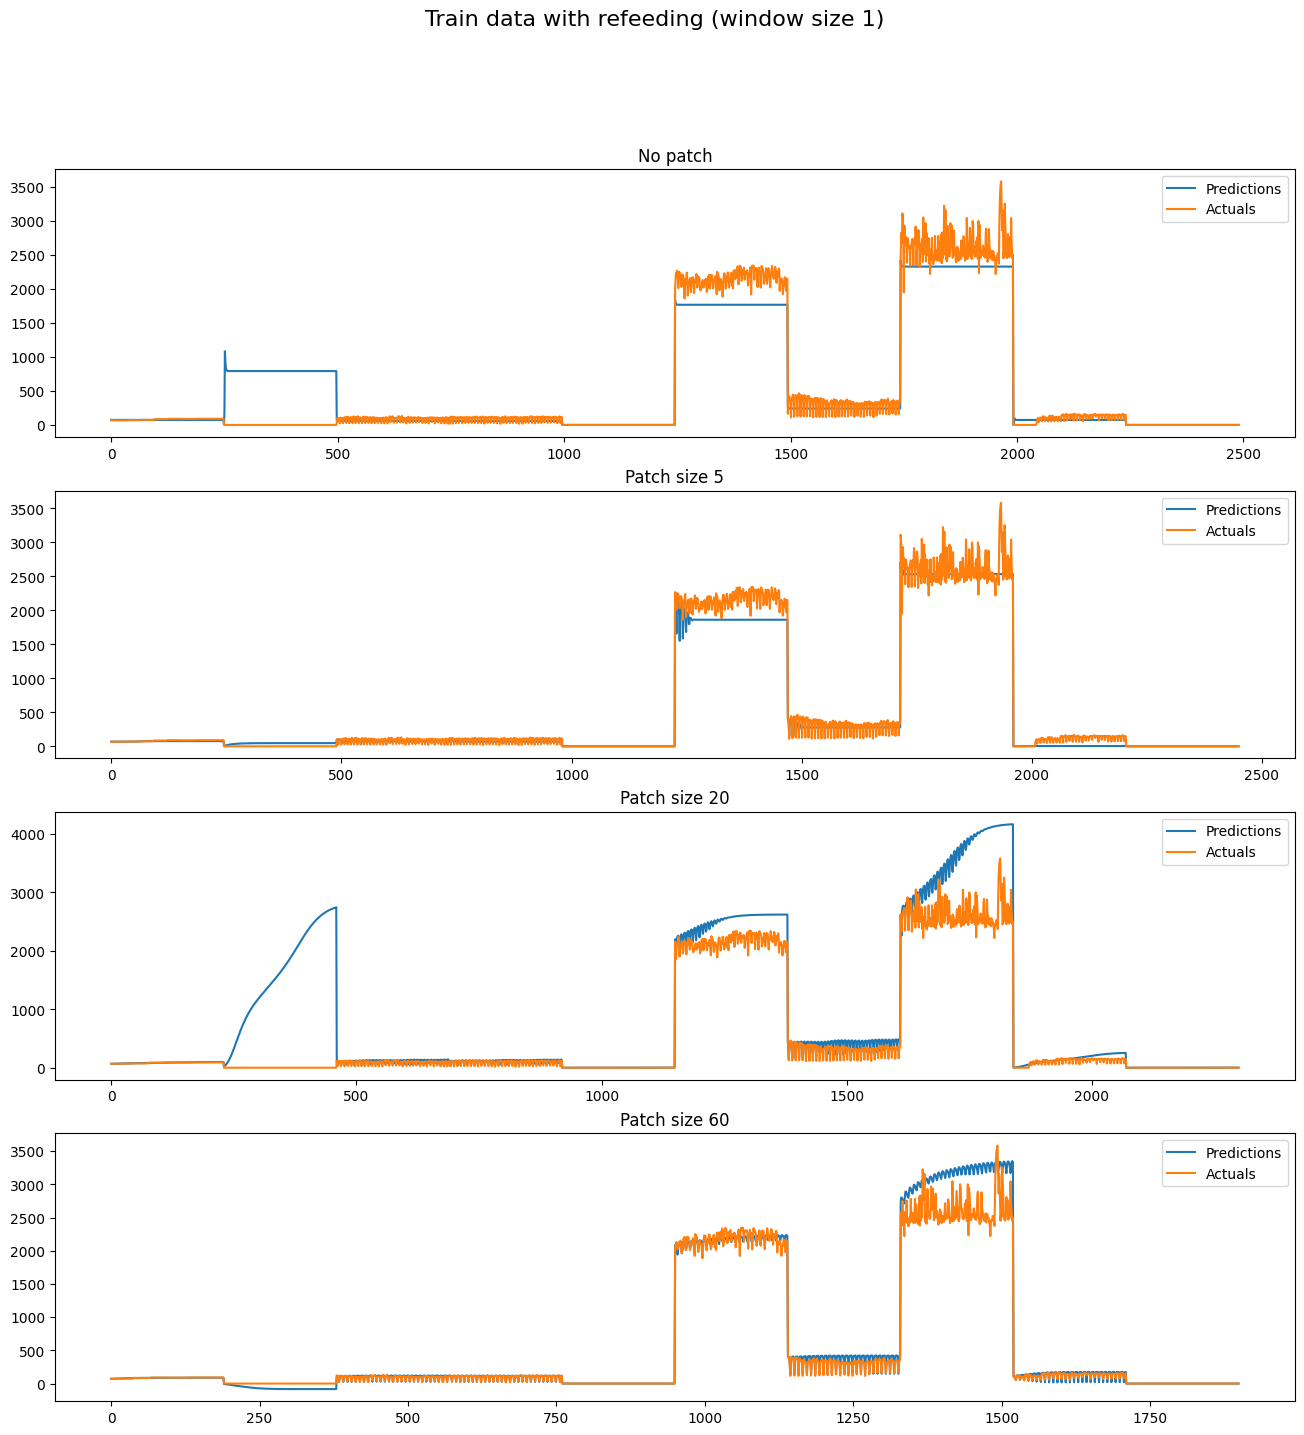

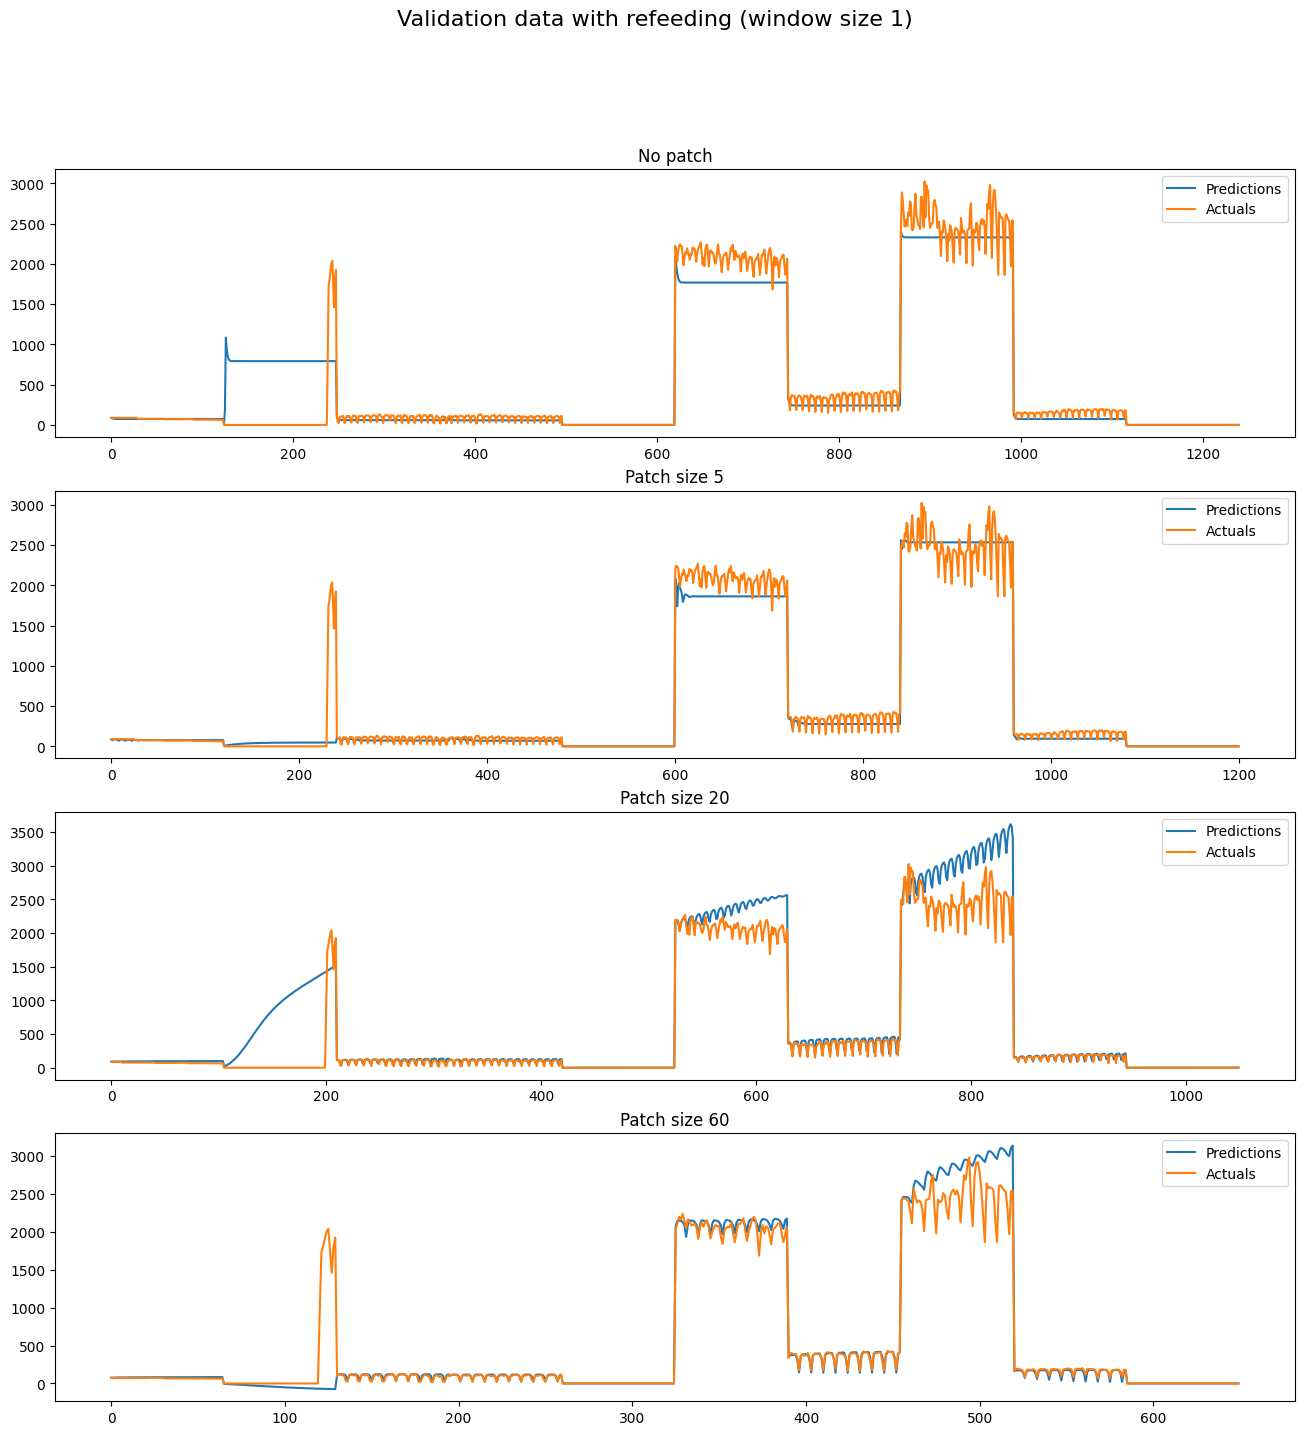

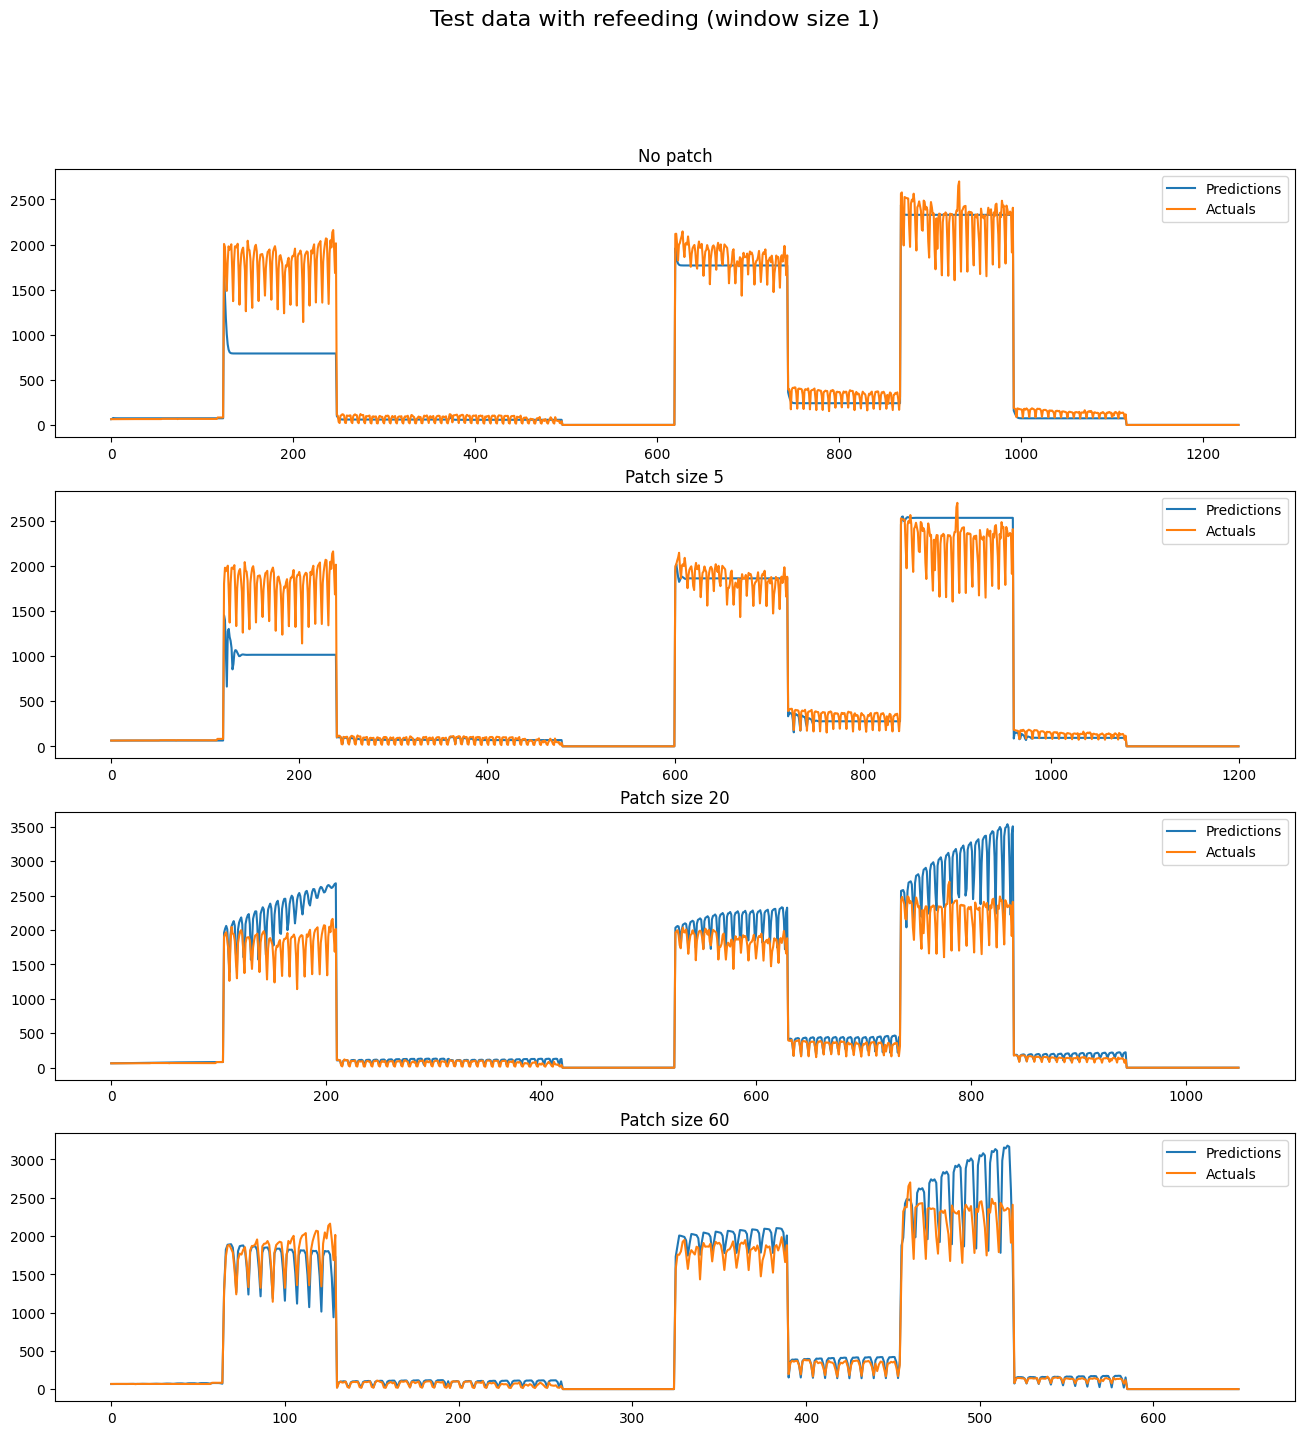

In [26]:
train_p_rf = pd.DataFrame(data={'Predictions':train_pred_rf.flatten(), 'Actuals':y_train.flatten()})
train_p5_rf = pd.DataFrame(data={'Predictions':train_pred_rf_p5.flatten(), 'Actuals':y_train_p5.flatten()})
train_p20_rf = pd.DataFrame(data={'Predictions':train_pred_rf_p20.flatten(), 'Actuals':y_train_p20.flatten()})
train_p60_rf = pd.DataFrame(data={'Predictions':train_pred_rf_p60.flatten(), 'Actuals':y_train_p60.flatten()})

val_p_rf = pd.DataFrame(data={'Predictions':val_pred_rf.flatten(), 'Actuals':y_val.flatten()})
val_p5_rf = pd.DataFrame(data={'Predictions':val_pred_rf_p5.flatten(), 'Actuals':y_val_p5.flatten()})
val_p20_rf = pd.DataFrame(data={'Predictions':val_pred_rf_p20.flatten(), 'Actuals':y_val_p20.flatten()})
val_p60_rf = pd.DataFrame(data={'Predictions':val_pred_rf_p60.flatten(), 'Actuals':y_val_p60.flatten()})

test_p_rf = pd.DataFrame(data={'Predictions':test_pred_rf.flatten(), 'Actuals':y_test.flatten()})
test_p5_rf = pd.DataFrame(data={'Predictions':test_pred_rf_p5.flatten(), 'Actuals':y_test_p5.flatten()})
test_p20_rf = pd.DataFrame(data={'Predictions':test_pred_rf_p20.flatten(), 'Actuals':y_test_p20.flatten()})
test_p60_rf = pd.DataFrame(data={'Predictions':test_pred_rf_p60.flatten(), 'Actuals':y_test_p60.flatten()})

plotGraph(train_p_rf, train_p5_rf, train_p20_rf, train_p60_rf, "Train data with refeeding (window size 1)")
plotGraph(val_p_rf, val_p5_rf, val_p20_rf, val_p60_rf, "Validation data with refeeding (window size 1)")
plotGraph(test_p_rf, test_p5_rf, test_p20_rf, test_p60_rf, "Test data with refeeding (window size 1)")